In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np 
%matplotlib inline

In [32]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [33]:
X.shape,y.shape

((1000, 2), (1000,))

In [34]:
X

array([[ 6.91015931,  2.37804531],
       [ 6.07227533,  9.72600754],
       [ 6.40358113,  1.44296864],
       ...,
       [ 6.73511051,  9.5088986 ],
       [-7.22375081,  6.82168982],
       [ 6.25716107,  0.25426806]])

In [35]:
y

array([2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2,
       2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0,
       2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 1,
       1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1,
       0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0,
       2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 1,
       0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1,
       0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0,

## plotting

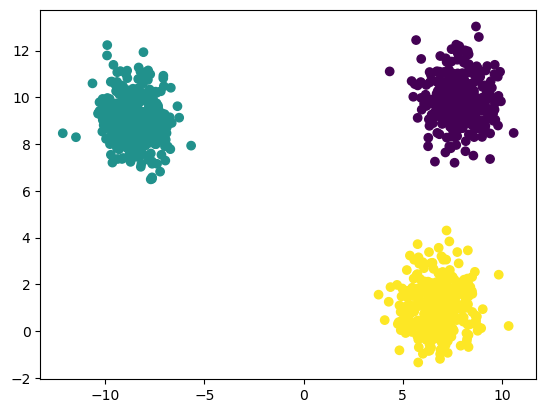

In [36]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

## feature scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42) # ignore y_test and y_train for these practicals

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_sclaed = scaler.transform(X_test)

## kmeans

In [41]:
from sklearn.cluster import KMeans

### Elbow method to select k value 

In [42]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [43]:
kmeans.labels_

array([3, 0, 6, 6, 3, 9, 8, 3, 0, 0, 2, 4, 3, 3, 5, 2, 0, 9, 0, 4, 2, 7,
       8, 3, 3, 0, 9, 4, 8, 2, 0, 0, 7, 4, 2, 4, 3, 0, 4, 2, 7, 3, 4, 6,
       2, 9, 2, 6, 4, 3, 3, 8, 8, 2, 6, 2, 5, 2, 8, 6, 7, 4, 4, 2, 5, 6,
       3, 2, 1, 2, 0, 0, 8, 6, 7, 2, 2, 0, 2, 5, 4, 4, 2, 3, 4, 2, 0, 2,
       5, 0, 2, 0, 3, 5, 8, 2, 3, 0, 2, 8, 8, 1, 4, 1, 0, 0, 0, 4, 2, 8,
       0, 5, 4, 0, 5, 5, 3, 4, 3, 0, 4, 9, 0, 7, 0, 4, 8, 2, 3, 2, 6, 6,
       8, 2, 6, 0, 2, 7, 4, 6, 6, 4, 7, 2, 7, 2, 2, 0, 6, 0, 3, 8, 6, 2,
       7, 9, 2, 2, 9, 3, 4, 1, 0, 9, 8, 8, 0, 4, 9, 8, 4, 2, 2, 0, 3, 8,
       2, 3, 8, 3, 6, 8, 2, 0, 8, 4, 6, 2, 7, 3, 9, 2, 3, 0, 8, 0, 9, 2,
       6, 0, 5, 0, 0, 5, 5, 8, 2, 3, 3, 8, 6, 1, 2, 0, 0, 8, 0, 5, 9, 8,
       6, 9, 9, 0, 4, 8, 9, 6, 3, 2, 7, 8, 3, 5, 4, 9, 8, 5, 4, 0, 7, 4,
       4, 2, 6, 9, 4, 2, 8, 3, 6, 3, 2, 5, 3, 0, 6, 2, 3, 0, 9, 0, 2, 0,
       8, 4, 4, 0, 3, 7, 4, 9, 5, 2, 4, 2, 5, 2, 1, 6, 7, 0, 8, 4, 3, 5,
       9, 8, 5, 3, 3, 8, 0, 6, 2, 3, 7, 2, 4, 2, 0,

In [44]:
wcss

[1340.0000000000014,
 563.3111004406396,
 51.840357592978044,
 43.06846170220987,
 35.364425229171566,
 26.230282979340494,
 23.640714586481778,
 21.13007686076442,
 18.481613529577984,
 17.44809599566957]

### plot elbow curve

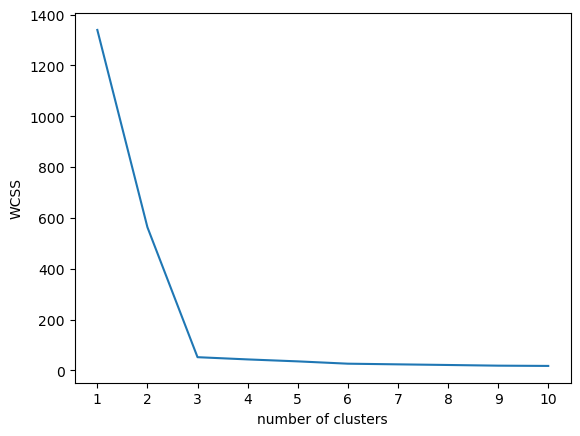

In [45]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

## Model 

In [46]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [47]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2,
       0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1,
       1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2,

In [48]:
y_pred=kmeans.predict(X_test_sclaed)

In [49]:
y_pred

array([0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 2,
       1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1,
       2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2,
       0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2,
       0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0,

### plotting test data

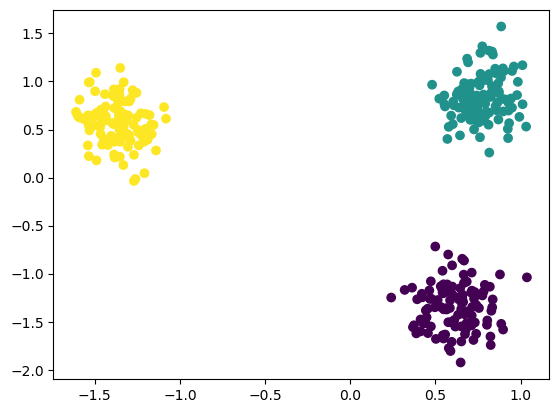

In [50]:
plt.scatter(X_test_sclaed[:,0],X_test_sclaed[:,1],c=y_pred)
plt.show()

#### validating k value [another way]

 - kneelocater
 - silhoutee scoring

In [51]:
## kneelocater
!pip install kneed

In [52]:
from kneed import KneeLocator

In [53]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [54]:
k1.elbow

3

In [55]:
## silhoutee scoring 


In [56]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [58]:
silhouette_coefficients

[0.6192800815373438,
 0.8384934755413844,
 0.6935831969888187,
 0.5538403956844351,
 0.5262235172930079,
 0.39345128099545806,
 0.4891918771738068,
 0.351313339409521,
 0.3504796603730105]

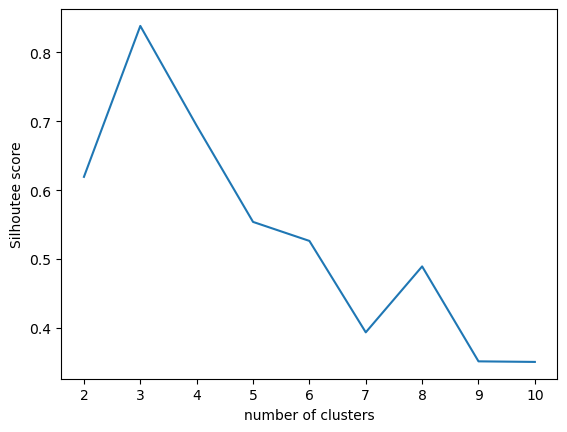

In [60]:
#plotting silhouttee scoring 
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('number of clusters')
plt.ylabel('Silhoutee score')
plt.show()

# CONCLUSION

### k-value should be 3, verified